In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
import os
import glob
import shutil
import itertools
import warnings

In [2]:
os.getcwdb ()

F:\Software\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead
  """Entry point for launching an IPython kernel.


b'C:\\Users\\Faramarz\\Desktop\\Keras Practice'

# Making files in my directory

In [3]:
os.chdir('cat-dog')
if os.path.isdir('train\dog') is False:
    os.makedirs('train\dog')
    os.makedirs('train\cat')
    os.makedirs('valid\dog')
    os.makedirs('valid\cat')
    os.makedirs('test\dog')
    os.makedirs('test\cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train\dog')
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train\cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid\dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid\cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test\dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test\cat')
os.chdir('C:\\Users\\Faramarz\\Desktop\\Keras Practice')

In [4]:
train_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\cat-dog\\train'
valid_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\cat-dog\\valid'
test_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\cat-dog\\test'

In [5]:
train_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
valid_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
test_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batch.n==1000
assert valid_batch.n==200
assert test_batch.n==100
assert train_batch.num_classes==valid_batch.num_classes==test_batch.num_classes==2

In [7]:
img,labels=next(train_batch)

In [8]:
def plot_images(image):
    fig,axis=plt.subplots(1,10, figsize=(20,20))
    axis=axis.flatten()
    for img,ax in zip(image,axis):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

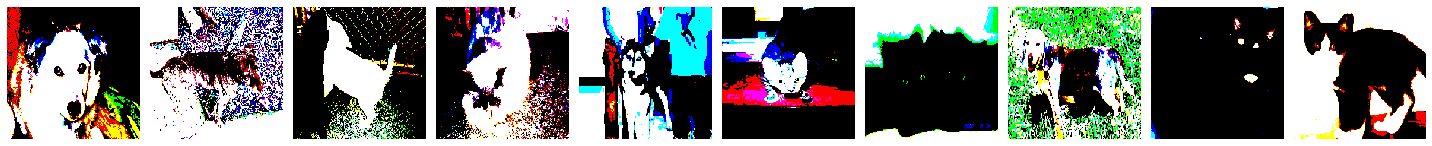

In [9]:
plot_images(img)

In [10]:
print(labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [11]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers import Activation, Dense, Flatten , Conv2D, MaxPool2D

In [12]:
model=keras.models.Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Flatten(),
    Dense(units=2, activation='softmax')])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 802816)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1605634   
Total params: 1,625,026
Trainable params: 1,625,026
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), metrics=['accuracy'],loss='categorical_crossentropy' )

# steps_per_epoch and validation_steps are equal to
(number of items in iterator)/ (number of items in a batch)

In [15]:
model.fit(x=train_batch,validation_data=valid_batch, epochs=5, verbose=2, steps_per_epoch=50,validation_steps=10)

Epoch 1/5
50/50 - 48s - loss: 153.7681 - accuracy: 0.5520 - val_loss: 2.2341 - val_accuracy: 0.5300
Epoch 2/5
50/50 - 46s - loss: 1.0336 - accuracy: 0.7020 - val_loss: 1.0047 - val_accuracy: 0.5500
Epoch 3/5
50/50 - 45s - loss: 0.4168 - accuracy: 0.8400 - val_loss: 1.1893 - val_accuracy: 0.5700
Epoch 4/5
50/50 - 44s - loss: 0.2826 - accuracy: 0.8880 - val_loss: 0.9498 - val_accuracy: 0.5900
Epoch 5/5
50/50 - 43s - loss: 0.1732 - accuracy: 0.9500 - val_loss: 0.8773 - val_accuracy: 0.6500


# Pridict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

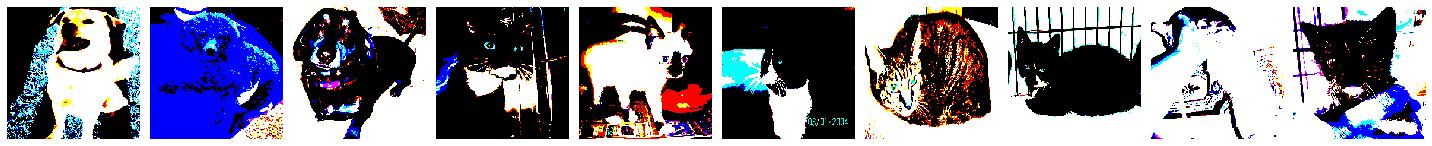

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [19]:
img,label=next(test_batch)
plot_images(img)
print(label)

In [20]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
prediction= model.predict(x=test_batch)

In [27]:
np.round(prediction)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm= confusion_matrix(y_true=test_batch.classes, y_pred=np.argmax(prediction, axis=-1))

In [51]:
def plot_confusion_matrxi(cm,classes,normilize=False,title='Confusion Matrix', cmap=plt.cm.Accent):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normilize:
        cm=cm.astype('float')/cm.sum(axis=1)[: , np.newaxis]
        print('Normilized Confusion Matrix')
    else:
        print('Without Normalization')
        
    print(cm)
    thresh=cm.max()/2.
    for j,i in itertools.product(range (cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j,cm[i,j],
                color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

In [52]:
test_batch.class_indices

{'cat': 0, 'dog': 1}

Without Normalization
[[25 25]
 [28 22]]


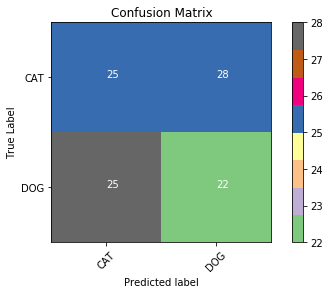

In [53]:
cm_plot_labels=['CAT','DOG']
plot_confusion_matrxi(cm=cm, classes=cm_plot_labels)